<a href="https://colab.research.google.com/github/HiagoAD/GDI2/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd


## **Datasets**


In [116]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb.csv", encoding ="UTF-8")


## **Detalhamento de datasets**


In [124]:
pd.to_datetime("2020-07-08T00:00:00")

Timestamp('2020-07-08 00:00:00')

In [14]:
emlurb.describe()

,_id,GRUPOSERVICO_CODIGO,SERVICO_CODIGO,RPA
count,87605.000000,87605.000000,87605.000000,87605.000000
mean,43803.000000,16.608630,51.750437,3.897860
std,25289.529503,5.585911,88.238726,1.655236
min,1.000000,7.000000,1.000000,1.000000
25%,21902.000000,15.000000,16.000000,3.000000
50%,43803.000000,17.000000,25.000000,4.000000
75%,65704.000000,20.000000,41.000000,6.000000
max,87605.000000,34.000000,434.000000,6.000000


In [15]:
dengue.describe()

,_id,nu_notificacao,tp_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,ds_semana_sintoma,nu_idade,tp_gestante,tp_raca_cor,tp_escolaridade,co_uf_residencia,co_municipio_residencia,co_regional_residencia,co_distrito_residencia,co_bairro_residencia,co_logradouro_residencia,nu_cep_residencia,tp_zona_residencia,co_pais_residencia,co_cbo_ocupacao,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,artrite,artralgia,petequia_n,leucopenia,laco,dor_retro,diabetes,hematolog,...,clinc_chik,tp_evolucao_caso,alrm_hipot,alrm_plaq,alrm_vom,alrm_sang,alrm_hemat,alrm_abdom,alrm_letar,alrm_hepat,alrm_liq,grav_pulso,grav_conv,grav_ench,grav_insuf,grav_taqui,grav_extre,grav_hipot,grav_hemat,grav_melen,grav_metro,grav_sang,grav_ast,grav_mioc,grav_consc,grav_orgao,dt_grav,mani_hemor,epistaxe,gengivo,metro,petequias,hematura,sangram,laco_n,plasmatico,evidencia,plaq_menor,con_fhd,complica
count,1009.000000,1.009000e+03,1009.0,1009.000000,1009.000000,1009.000000,1009.000000,1007.000000,1.009000e+03,1009.000000,1009.000000,1009.000000,1009.000000,951.000000,1009.0,1009.0,1009.0,764.000000,941.000000,0.0,3.600000e+02,982.000000,1009.0,130.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,21.0,712.000000,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,505.000000,3.487950e+06,2.0,202014.431120,2019.999009,26.035679,261485.601586,1497.365442,2.751305e+06,202013.430129,3973.864222,6.323092,6.621407,8.452156,26.0,261160.0,1497.0,287.884817,47.806589,NaN,5.100516e+07,1.106925,1.0,771437.776923,1.097980,1.372727,1.293939,1.766667,1.723232,1.744444,1.809091,1.965657,1.905051,1.676768,1.880808,1.967677,1.992929,1.827273,1.971717,1.987879,...,1.0,1.202247,1.894737,1.578947,1.894737,1.842105,1.947368,1.400000,1.947368,1.947368,1.894737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,291.417513,4.351721e+05,0.0,8.949121,0.031481,1.104965,11035.027746,18.770814,2.721492e+06,8.791530,298.770338,1.463400,2.856241,1.861966,0.0,0.0,0.0,211.023400,27.866070,NaN,1.565733e+06,0.915254,0.0,299930.352641,0.297438,0.483775,0.455795,0.423166,0.447627,0.436393,0.393216,0.182202,0.293293,0.467947,0.324178,0.176947,0.083832,0.378202,0.165863,0.109482,...,0.0,1.229545,0.315302,0.507257,0.315302,0.374634,0.229416,0.502625,0.229416,0.229416,0.315302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.759770e+05,2.0,202001.000000,2019.000000,14.000000,140047.000000,1342.000000,3.500000e+01,202001.000000,2001.000000,1.000000,1.000000,0.000000,26.0,261160.0,1497.0,4.000000,1.000000,NaN,2.507044e+07,1.000000,1.0,141410.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,253.000000,3.514737e+06,2.0,202007.000000,2020.000000,26.000000,261160.000000,1497.000000,9.810000e+02,202006.000000,4013.000000,6.000000,4.000000,9.000000,26.0,261160.0,1497.0,119.000000,23.000000,NaN,5.069034e+07,1.000000,1.0,516393.750000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.0,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [100]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

IBURA              186
COHAB               63
AREIAS              31
AFOGADOS            31
BOA VIAGEM          31
                  ... 
DERBY                1
ALTO DO PASCOAL      1
POCO DA PANELA       1
JAQUEIRA             1
JORDAO BAIXO         1
Name: no_bairro_residencia, Length: 95, dtype: int64

In [128]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="count")

,no_bairro_residencia,dt_notificacao,count
0,AFOGADOS,2020-01-13,1
1,AFOGADOS,2020-01-23,1
2,AFOGADOS,2020-01-24,2
3,AFOGADOS,2020-01-29,1
4,AFOGADOS,2020-02-03,1
...,...,...,...
738,VAZIA,2020-02-29,1
739,VAZIA,2020-03-07,1
740,ZUMBI,2020-01-11,1
741,ZUMBI,2020-01-15,2


In [184]:
emlurb_data = emlurb[["_id", "GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

emlurb_data.head()

,_id,GRUPOSERVICO_DESCRICAO,BAIRRO,DATA_DEMANDA
12107,12108,DRENAGEM,TORROES,2020-06-22
12108,12109,DRENAGEM,VARZEA,2020-10-27
12109,12110,DRENAGEM,MANGUEIRA,2020-08-24
12110,12111,DRENAGEM,BOMBA DO HEMETERIO,2020-06-18
12111,12112,DRENAGEM,DOIS UNIDOS,2020-03-11


In [185]:
emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="count")


,BAIRRO,DATA_DEMANDA,count
0,AFLITOS,2020-01-01,0
1,AFLITOS,2020-01-02,0
2,AFLITOS,2020-01-03,0
3,AFLITOS,2020-01-04,0
4,AFLITOS,2020-01-06,0
...,...,...,...
32801,ZUMBI,2020-12-20,0
32802,ZUMBI,2020-12-21,0
32803,ZUMBI,2020-12-22,0
32804,ZUMBI,2020-12-23,0


In [ ]:
teste = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"])
teste

In [89]:
emlurb_data = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 200)

emlurb_data.value_counts()

GRUPOSERVICO_DESCRICAO  BAIRRO            
DRENAGEM                SANTO AMARO           436
                        BOA VIAGEM            382
                        AFOGADOS              328
                        CORDEIRO              325
                        SAO JOSE              290
                        TORROES               289
                        VARZEA                274
                        IMBIRIBEIRA           264
                        PINA                  263
                        IPUTINGA              257
                        SAN MARTIN            245
                        CAMPO GRANDE          240
                        COHAB                 223
                        IBURA                 214
                        ILHA JOANA BEZERRA    209
dtype: int64

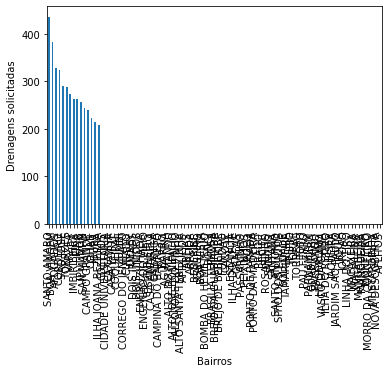

In [92]:
emlurb_data['BAIRRO'].value_counts().plot(kind='bar', xlabel='Bairros', ylabel='Drenagens solicitadas', )


In [ ]:
from scipy import stats

merge=pd.merge(emlurb,dengue,left_on='BAIRRO',right_on='no_bairro_residencia')

Tentando ver como mudar o tipo de bairro para poder rodar os testes de hipótese

In [ ]:
merge["BAIRRO"] = merge["BAIRRO"].astype('category')
#merge["BAIRRO"].cat.codes()